In [1]:
from SubsidieModel import SubsidieModel
from SubsidieModel import AdoptionAgent
from VermogenInkomen import genereer_random_vermogen




In [2]:
model = SubsidieModel()

for i in range(10):
    model.step()

/Users/michielvanhouten/Dropbox/Mac/Documents/GitHub/abm/.venv/lib/python3.9/site-packages/mesa/time.py:82: FutureWarning: The AgentSet is experimental. It may be changed or removed in any and all future releases, including patch releases.
We would love to hear what you think about this new feature. If you have any thoughts, share them with us here: https://github.com/projectmesa/mesa/discussions/1919
  self._agents: AgentSet = AgentSet(agents, model)


<class 'float'> 3941.6440354295114
<class 'float'>
<class 'float'> 3916.7591751093664
<class 'float'>
<class 'float'> 3892.031420876829
<class 'float'>
<class 'float'> 3867.4597808708886
<class 'float'>
<class 'float'> 3843.0432694924666
<class 'float'>
<class 'float'> 3818.7809073648896
<class 'float'>
<class 'float'> 3794.671721294601
<class 'float'>
<class 'float'> 3770.7147442321266
<class 'float'>
<class 'float'> 3746.9090152332865
<class 'float'>
<class 'float'> 3723.253579420647
<class 'float'>


In [3]:
cell_0_0 = model.grid.get_cell_list_contents([(0, 0)])

if cell_0_0:
    print("Agent aanwezig op cel (1, 1)")
else:
    print("Geen agent aanwezig op cel (1, 1)")

for agent in model.schedule.agents:
    position = agent.pos
    agent_type = agent.agent_type
    print(f"Agent Type at position ({position[0]} , {position[1]}): {agent_type}")

Agent aanwezig op cel (1, 1)
Agent Type at position (21 , 29): TypeAdopter.LAGGARDS
Agent Type at position (34 , 34): TypeAdopter.LATE_MAJORITY
Agent Type at position (46 , 7): TypeAdopter.EARLY_MAJORITY
Agent Type at position (33 , 35): TypeAdopter.EARLY_MAJORITY
Agent Type at position (4 , 32): TypeAdopter.EARLY_ADOPTER
Agent Type at position (29 , 26): TypeAdopter.EARLY_MAJORITY
Agent Type at position (35 , 34): TypeAdopter.EARLY_MAJORITY
Agent Type at position (22 , 15): TypeAdopter.EARLY_ADOPTER
Agent Type at position (25 , 12): TypeAdopter.LAGGARDS
Agent Type at position (25 , 21): TypeAdopter.EARLY_MAJORITY
Agent Type at position (38 , 27): TypeAdopter.EARLY_MAJORITY
Agent Type at position (25 , 5): TypeAdopter.EARLY_ADOPTER
Agent Type at position (19 , 12): TypeAdopter.EARLY_ADOPTER
Agent Type at position (19 , 44): TypeAdopter.LATE_MAJORITY
Agent Type at position (24 , 25): TypeAdopter.EARLY_MAJORITY
Agent Type at position (48 , 18): TypeAdopter.LATE_MAJORITY
Agent Type at pos

In [4]:
from SubsidieModel import TypeAdopter, count_type

a = count_type(model, TypeAdopter.INNOVATOR)
print(a)
b = count_type(model, TypeAdopter.EARLY_ADOPTER)
print(b)
c = count_type(model, TypeAdopter.EARLY_MAJORITY)
print(c)
d = count_type(model, TypeAdopter.LATE_MAJORITY)
print(d)
e = count_type(model, TypeAdopter.LAGGARDS)
print(e)

# Totaal aantal agents
total = a + b + c + d + e
print(total)

63
338
847
851
401
2500


In [5]:
for i in range(10):
    model.step
    

model_data = model.datacollector.get_model_vars_dataframe()

print(model_data)


   Gemiddelde belangstelling  Aantal gekochte EV  Aantal gekochte FBA  \
0                   0.327409                   6                    8   
1                   0.326789                  11                   10   
2                   0.326173                  17                   14   
3                   0.325561                  23                   17   
4                   0.324953                  26                   18   
5                   0.324349                  27                   18   
6                   0.323749                  30                   22   
7                   0.323152                  31                   24   
8                   0.322559                  32                   24   
9                   0.321970                  32                   25   

   Percentage huishoudens in bezit auto  Percerntage EV's van Auto's  
0                                0.7380                     0.003252  
1                                0.7388               

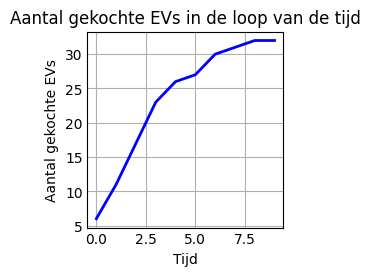

In [6]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# Assuming model_data is defined somewhere earlier in your code
# Haal het aantal gekochte EV's uit de modelgegevens
aantal_gekochte_evs = model_data['Aantal gekochte EV'].tolist()

y = aantal_gekochte_evs
# Maak een array voor de tijd (stappen)
x = np.arange(len(aantal_gekochte_evs))

# Plot
fig, ax = plt.subplots()

# Plot het aantal gekochte EV's in de loop van de tijd
ax.plot(x, aantal_gekochte_evs, linewidth=2.0, color='blue')  # Use x as time steps

ax.set_xlabel('Tijd')
ax.set_ylabel('Aantal gekochte EVs')
ax.set_title('Aantal gekochte EVs in de loop van de tijd')

plt.show()
